## Library Imports


In [111]:
%load_ext autoreload
%autoreload 2
# Loading the Feature Extractor Backbone
import torchvision as tv
import torch
from torchinfo import summary
from src.models import backbone_registry as br
# Necessary to register the models
from src.models import backbones as bb
from torchvision.transforms import v2
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from src.data import utils as data_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
### VARIABLES
INPUT_SHAPE = (3, 800, 800)
BACKBONE = "VGG16"  # can be "RESNET34", "RESNET50", "RESNET101"
ROOT = "../../data/raw/PennFudanPed"
IMAGE_DIR = "PNGImages"
MASK_DIR = "PedMasks"

## Loading the Dataset


In [103]:
resize_transform = v2.Compose(
    [
        v2.Resize(
            (800, 800), interpolation=v2.functional.InterpolationMode.BICUBIC
        ),
    ]
)

In [104]:
dataset = data_utils.Masks2BboxDataset(
    root=ROOT,
    image_dir=IMAGE_DIR,
    mask_dir=MASK_DIR,
    transforms=resize_transform,
)

# Get subsets for train, validation, and test splits
train_subset = dataset.get_subset(dataset.train_indices)
valid_subset = dataset.get_subset(dataset.valid_indices)
test_subset = dataset.get_subset(dataset.test_indices)

# Create data loaders for train, validation, and test splits
train_loader = DataLoader(
    train_subset,
    batch_size=4,
    shuffle=True,
    collate_fn=lambda x: tuple(zip(*x)),
)
valid_loader = DataLoader(
    valid_subset,
    batch_size=4,
    shuffle=False,
    collate_fn=lambda x: tuple(zip(*x)),
)
test_loader = DataLoader(
    test_subset,
    batch_size=4,
    shuffle=False,
    collate_fn=lambda x: tuple(zip(*x)),
)

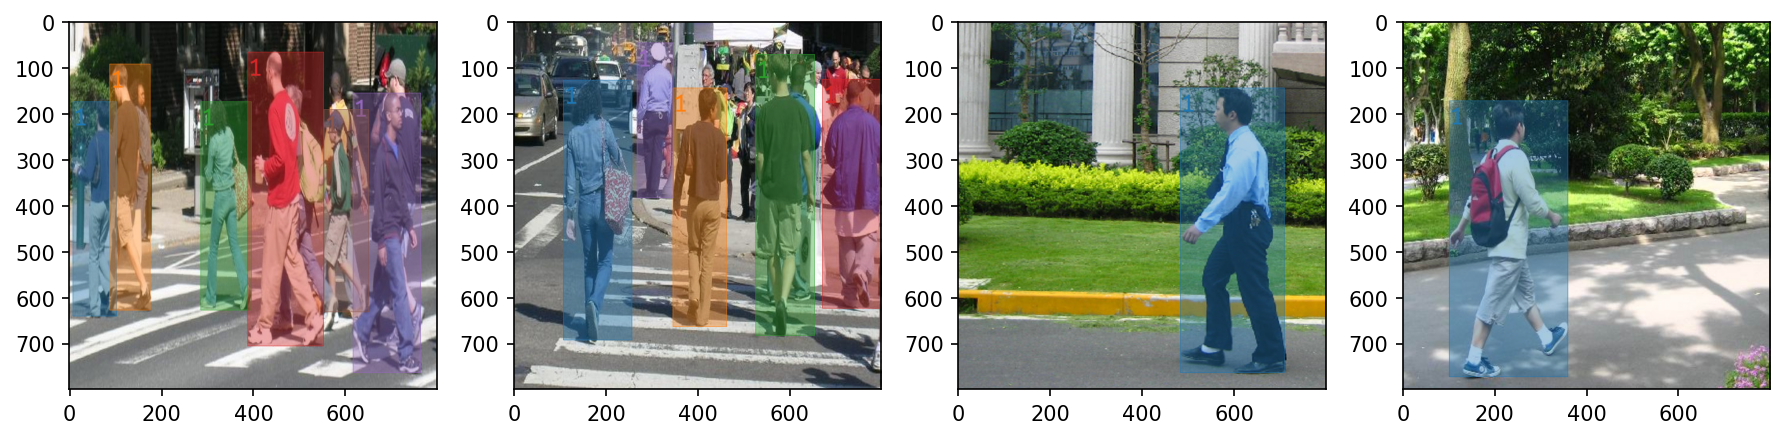

In [116]:
data_utils.plot_batch(train_loader, batch_idx=0)

## Feature Extraction


In [117]:
INPUT_SHAPE = (3, 800, 800)
bb_last_layer_shape, bb = br.BackBoneRegistry.create_backbone(
    BACKBONE, INPUT_SHAPE
)
PATCH_SIZE = (
    int(INPUT_SHAPE[1] / bb_last_layer_shape[2]),
    int(INPUT_SHAPE[2] / bb_last_layer_shape[3]),
)

In [14]:
print(f"Last Layer Shape: {bb_last_layer_shape}")
print(
    f"Single pixel in backbone feature map represents a patch of {PATCH_SIZE[0]} X {PATCH_SIZE[1]}"
)

Last Layer Shape: torch.Size([1, 512, 50, 50])
Single pixel in backbone feature map represents a patch of 16 X 16
